<div class="alert alert-block alert-success">
This jupyter notebook is part of the supplementary material for the book "Materials Data Science" (Stefan Sandfeld, Springer, 2024, DOI 10.1007/978-3-031-46565-9). For further details please refer to the accompanying webpage at <a href="https://mds-book.org">https://mds-book.org</a>.
</div>

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## 14.5 Gaussian Naive Bayes Model
### 14.5.3 Algorithm and Python Implementation

In the following, we write the GNB Algorithm for the special case of two classes and avoid for loops and advanced
vectorization in favor for readability.

In [2]:
import numpy as np
from scipy.stats import norm    # Gaussian distribution
from numpy.random import multivariate_normal

Here, `multivariate_norm` is used for sampling from a bivariate Gaussian distribution for creating
training data:

In [3]:
X_class0 = multivariate_normal(mean=(-1, 0), cov=[[1, 0], [0,2]], size=30)
X_class1 = multivariate_normal(mean=(2, 3), cov=[[1, 0], [0,1]], size=20)
Y_class0 = np.zeros_like(X_class0)
Y_class1 = np.ones_like(X_class1)

Next, we compute the mean values for all classes and for all features. As additional
preparation, we also already computed the marginal probabilities of both classes.

In [4]:
means_class0 = [np.mean(X_class0[:,0]), np.mean(X_class0[:,1])]
means_class1 = [np.mean(X_class1[:,0]), np.mean(X_class1[:,1])]

stddev_class0 = [np.std(X_class0[:,0]), np.std(X_class0[:,1])]
stddev_class1 = [np.std(X_class1[:,0]), np.std(X_class1[:,1])]

P_Y_for_class_0 = np.size(Y_class0) / (np.size(Y_class0) + np.size(Y_class1))
P_Y_for_class_1 = np.size(Y_class1) / (np.size(Y_class0) + np.size(Y_class1))

Now, the model is trained, and we choose a feature vector for which we seek the class
label.

In [5]:
X_pred = np.array([0, 1])

Subsequently, we create numpy “Gaussian random variables” that can
be used to evaluate the PDF at the “location” X_pred . (cf. Section 10.7 for more details).

In [6]:
# class 0
rv0 = norm(loc=means_class0[0], scale=stddev_class0[0])
rv1 = norm(loc=means_class0[1], scale=stddev_class0[1])
P_X1_given_class0 = rv0.pdf(X_pred[0])
P_X2_given_class0 = rv1.pdf(X_pred[1])

# class 1
rv0 = norm(loc=means_class1[0], scale=stddev_class1[0])
rv1 = norm(loc=means_class1[1], scale=stddev_class1[1])
P_X1_given_class1 = rv0.pdf(X_pred[0])
P_X2_given_class1 = rv1.pdf(X_pred[1])

Finally, we are able to compute the scores for the point w.r.t. both classes

In [7]:
P_X_given_class0 = P_X1_given_class0 * P_X2_given_class0
P_X_given_class1 = P_X1_given_class1 * P_X2_given_class1
score_class0_given_X1_X2 = P_X_given_class0 * P_Y_for_class_0
score_class1_given_X1_X2 = P_X_given_class1 * P_Y_for_class_1

if score_class0_given_X1_X2 > score_class1_given_X1_X2:
    Y_pred = 0
else:
    Y_pred = 1

In [8]:
print("score class0:", score_class0_given_X1_X2)
print("score class1:", score_class1_given_X1_X2)
print("--> class", Y_pred)

score class0: 0.02328479308515339
score class1: 0.0002917487743530573
--> class 0


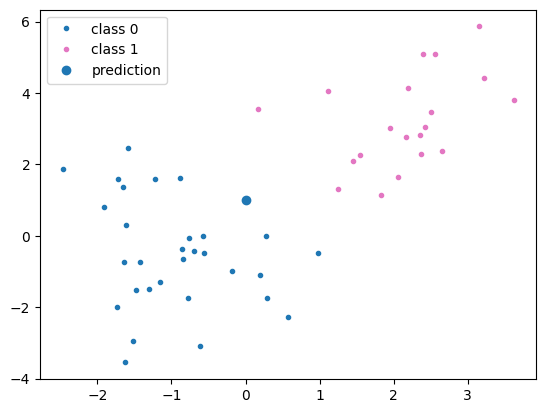

In [9]:
fig, ax = plt.subplots()
ax.plot(X_class0[:, 0], X_class0[:, 1], '.', c='C0', label='class 0')
ax.plot(X_class1[:, 0], X_class1[:, 1], '.', c='C6', label='class 1')
c = 'C0' if Y_pred == 0 else 'C6'
ax.plot(X_pred[0], X_pred[1], 'o', color=c, label='prediction')
ax.legend();